# Application Programming Interfaces

2024 NHERI Computational Academy  
Scott J. Brandenberg

## Jupyter Notebooks  
Complete Notebook  
[![Try on DesignSafe](https://raw.githubusercontent.com/geoelements/LearnMPM/main/DesignSafe-Badge.svg)](https://jupyter.designsafe-ci.org/user/name/notebooks/CommunityData/Training/2024-NHERI-AI-Academy/Day2/API_Example.ipynb.ipynb)  
Template  
[![Try on DesignSafe](https://raw.githubusercontent.com/geoelements/LearnMPM/main/DesignSafe-Badge.svg)](https://jupyter.designsafe-ci.org/user/name/notebooks/CommunityData/Training/2024-NHERI-AI-Academy/Day2/API_Example_Template.ipynb.ipynb)  
## Real-time traffic data

On Day 1, Charlie Dey presented a nice example using Pandas and Matplotlib to visualize real-time traffic data in Austin, TX from [this link](https://data.austintexas.gov/Transportation-and-Mobility/Real-Time-Traffic-Incident-Reports/dx9v-zd7x/about_data). He first downloaded a CSV file from the website, then loaded that CSV file into a Pandas dataframe.  

What we'll do in this notebook is use their API to retrieve custom data from the website instead of downloading the entire dataset as a CSV file. A benefit of using the API is that we can apply filters as part of the query to retrieve only the data that we need to plot, which saves some time and storage.

## Learning outcomes  

This notebook will demonstrate how to:

1. Use the Python requests package to submit a GET HTTP request to the Austin real-time traffic API
3. Convert the retrieved JSON string to a Python dictionary
4. Convert the retrieved JSON string to a Pandas dataframe
5. Add filters to the HTTP request to be more selective in data retrieval
6. Plot the traffic events by creating a lat / lon scatterplot

## Learning Outcome 1
Use the Python requests package to submit a GET HTTP request to the Austin real-time traffic API

In [10]:
import requests
import json
import pandas as pd
import io

url = 'https://data.austintexas.gov/resource/dx9v-zd7x.json?'
r = requests.get(url)
r_json = r.text

# The retrieved string is very long, so we shouldn't print the whole thing. 
# Just print the first 100 characters here.
print(r_json[0:100])

[{"traffic_report_id":"121E4F6B2D93D3F508359C8700406A1B992733AF_1659735434","published_date":"2022-0


## Learning Outcome 2

Convert the retrieved JSON string to a Python dictionary. Actually, the data comes to us as an array of JSON strings, so we will create a Python list of dictionaries.

In [16]:
# We will use the Python json package and the "loads" command to convert
# the string to a Python dictionary, and print the first entry of the array
# to make sure it worked correctly

r_dict = json.loads(r_json)
print(r_dict[0])

{'traffic_report_id': '121E4F6B2D93D3F508359C8700406A1B992733AF_1659735434', 'published_date': '2022-08-05T21:37:14.000Z', 'issue_reported': 'TRFC HAZD/ DEBRIS', 'location': {'type': 'Point', 'coordinates': [0, 0]}, 'latitude': '0', 'longitude': '0', 'address': 'tra', 'traffic_report_status': 'ARCHIVED', 'traffic_report_status_date_time': '2022-08-05T21:50:03.000Z'}


## Learning Outcome 3

Convert the retrieved JSON string to a Pandas dataframe. Python dictionaries are cool and everything, but Charlie used Pandas, so I'll do the same here. We have to wrap the JSON string using StringIO to prevent that annoying Pandas deprecation warning.

In [17]:
# Step 3. Convert the data from a JSON string to a Pandas dataframe

r_df = pd.read_json(io.StringIO(r_json))
r_df.head()

,traffic_report_id,published_date,issue_reported,location,latitude,longitude,address,traffic_report_status,traffic_report_status_date_time,:@computed_region_pgdr_vyqg,:@computed_region_u569_ruue,:@computed_region_ap3j_c5bq,:@computed_region_99rk_ypn4,:@computed_region_g44y_bfnm,:@computed_region_jcrc_4uuy,:@computed_region_q9nd_rr82,:@computed_region_e9j2_6w3z,:@computed_region_m2th_e4b7,:@computed_region_rxpj_nzrk,agency
0,121E4F6B2D93D3F508359C8700406A1B992733AF_16597...,2022-08-05T21:37:14.000Z,TRFC HAZD/ DEBRIS,"{'type': 'Point', 'coordinates': [0, 0]}",0.000000,0.000000,tra,ARCHIVED,2022-08-05 21:50:03+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,B852035718A45A6479B38C26FA96B28B0C9A8A56_16615...,2022-08-26T21:05:01.000Z,TRFC HAZD/ DEBRIS,"{'type': 'Point', 'coordinates': [0, 0]}",0.000000,0.000000,900 S FM 973,ARCHIVED,2022-08-26 21:35:03+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,B7CA5DF711D07BA6D03B6EF004402A6594C77CD6_16622...,2022-09-04T04:16:02.000Z,COLLISION,"{'type': 'Point', 'coordinates': [0, 0]}",0.000000,0.000000,12009 W US 290 HWY,ARCHIVED,2022-09-04 05:40:03+00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5F5898E4726001663BA5A126B313B03B1AED3F07_16631...,2022-09-14T15:14:19.000Z,Crash Urgent,"{'type': 'Point', 'coordinates': [-97.711561, ...",30.307396,-97.711561,4900 N Ih 35 Nb,ARCHIVED,2022-09-14 15:30:04+00:00,10.0,22.0,5.0,94.0,6.0,11.0,10.0,38.0,309.0,33.0,NaN
4,3791C82875F2B544CEFA8FBE35109575B1431A30_16631...,2022-09-14T13:50:59.000Z,TRFC HAZD/ DEBRIS,"{'type': 'Point', 'coordinates': [-97.820007, ...",30.233228,-97.820007,4953-4973 W Us 290 Hwy Eb,ARCHIVED,2022-09-14 14:10:02+00:00,68.0,1.0,NaN,178.0,6.0,32.0,NaN,NaN,126.0,53.0,NaN


## Learning Outcome 4 

Add filters to the HTTP request to be more selective in data retrieval. There are a few issues we need to sort out here. First, the API by default returns only 1000 entries. But we don't want to limit the data in this way because the full dataset has about 350,000 entries. Second, there were problems with some of the lat / lon coordinates in the original dataset. We filtered those out in post-processing before by looking only at latitude values between 30 and 31 and longitude values between -97 and -98. But if we use the API, we can make the server filter them for us and only return the ones we want.

In [55]:
url = 'https://data.austintexas.gov/resource/dx9v-zd7x.json?$limit=500000&$where=latitude between 29.5 and 31 and longitude between -98.5 and -97'
r = requests.get(url)
r_df = pd.read_json(io.StringIO(r.text))
r_df

,traffic_report_id,published_date,issue_reported,location,latitude,longitude,address,traffic_report_status,traffic_report_status_date_time,agency
0,5F5898E4726001663BA5A126B313B03B1AED3F07_16631...,2022-09-14T15:14:19.000Z,Crash Urgent,"{'type': 'Point', 'coordinates': [-97.711561, ...",30.307396,-97.711561,4900 N Ih 35 Nb,ARCHIVED,2022-09-14 15:30:04+00:00,NaN
1,3791C82875F2B544CEFA8FBE35109575B1431A30_16631...,2022-09-14T13:50:59.000Z,TRFC HAZD/ DEBRIS,"{'type': 'Point', 'coordinates': [-97.820007, ...",30.233228,-97.820007,4953-4973 W Us 290 Hwy Eb,ARCHIVED,2022-09-14 14:10:02+00:00,NaN
2,00F36866326DA3B8DDE0D960226DCD6AFB5AF127_16630...,2022-09-13T13:02:12.000Z,Crash Service,"{'type': 'Point', 'coordinates': [-97.780078, ...",30.439546,-97.780078,13096 N Us 183 Hwy Svrd Sb,ARCHIVED,2022-09-13 13:25:04+00:00,NaN
3,5546443CF7936F056C25DF636352D217C030756C_16631...,2022-09-14T13:16:12.000Z,Stalled Vehicle,"{'type': 'Point', 'coordinates': [-97.735557, ...",30.383593,-97.735557,0 RESEARCH NB TO N MOPAC SVRD NB RAMP,ARCHIVED,2022-09-14 14:10:02+00:00,NaN
4,85CA1FFDE3C0A7F9418AA74D8309CAF5A31749E9_16630...,2022-09-13T16:32:09.000Z,LOOSE LIVESTOCK,"{'type': 'Point', 'coordinates': [-97.933901, ...",30.597314,-97.933901,Round Mountain Rd & Great Oaks Blvd,ARCHIVED,2022-09-13 19:20:03+00:00,NaN
...,...,...,...,...,...,...,...,...,...,...
380966,EAEBB5DB2B93D9B0E80FF737B2983A774CDED173_17217...,2024-07-23T16:04:59.000Z,Traffic Hazard,"{'type': 'Point', 'coordinates': [-97.761749, ...",30.424873,-97.761749,11707-11799 Oak Knoll Dr,ARCHIVED,2024-07-23 16:25:15+00:00,AUSTIN PD
380967,5982FD0F37D93127B4D15129788CC3DE204635A9_17217...,2024-07-23T16:24:19.000Z,Crash Urgent,"{'type': 'Point', 'coordinates': [-97.730994, ...",30.274565,-97.730994,N Ih 35 Svrd Nb / E 15th St,ACTIVE,2024-07-23 16:30:20+00:00,AUSTIN PD
380968,BBFBF362460D2B5A1573BC939A7419DF3FFF1A54_17217...,2024-07-23T16:29:00.000Z,Crash Urgent,"{'type': 'Point', 'coordinates': [-97.834105, ...",30.223264,-97.834105,6301-6617 S Mopac Expy Nb,ACTIVE,2024-07-23 16:30:20+00:00,AUSTIN PD
380969,ABCD1C5876F36174110775438923CE78ACBF8594_17217...,2024-07-23T14:53:08.000Z,Traffic Hazard,"{'type': 'Point', 'coordinates': [-97.77275, 3...",30.187118,-97.772750,6900 S IH 35 NB,ARCHIVED,2024-07-23 16:35:16+00:00,AUSTIN PD


In [57]:
r_df.head()

,traffic_report_id,published_date,issue_reported,location,latitude,longitude,address,traffic_report_status,traffic_report_status_date_time,agency
0,5F5898E4726001663BA5A126B313B03B1AED3F07_16631...,2022-09-14T15:14:19.000Z,Crash Urgent,"{'type': 'Point', 'coordinates': [-97.711561, ...",30.307396,-97.711561,4900 N Ih 35 Nb,ARCHIVED,2022-09-14 15:30:04+00:00,NaN
1,3791C82875F2B544CEFA8FBE35109575B1431A30_16631...,2022-09-14T13:50:59.000Z,TRFC HAZD/ DEBRIS,"{'type': 'Point', 'coordinates': [-97.820007, ...",30.233228,-97.820007,4953-4973 W Us 290 Hwy Eb,ARCHIVED,2022-09-14 14:10:02+00:00,NaN
2,00F36866326DA3B8DDE0D960226DCD6AFB5AF127_16630...,2022-09-13T13:02:12.000Z,Crash Service,"{'type': 'Point', 'coordinates': [-97.780078, ...",30.439546,-97.780078,13096 N Us 183 Hwy Svrd Sb,ARCHIVED,2022-09-13 13:25:04+00:00,NaN
3,5546443CF7936F056C25DF636352D217C030756C_16631...,2022-09-14T13:16:12.000Z,Stalled Vehicle,"{'type': 'Point', 'coordinates': [-97.735557, ...",30.383593,-97.735557,0 RESEARCH NB TO N MOPAC SVRD NB RAMP,ARCHIVED,2022-09-14 14:10:02+00:00,NaN
4,85CA1FFDE3C0A7F9418AA74D8309CAF5A31749E9_16630...,2022-09-13T16:32:09.000Z,LOOSE LIVESTOCK,"{'type': 'Point', 'coordinates': [-97.933901, ...",30.597314,-97.933901,Round Mountain Rd & Great Oaks Blvd,ARCHIVED,2022-09-13 19:20:03+00:00,NaN


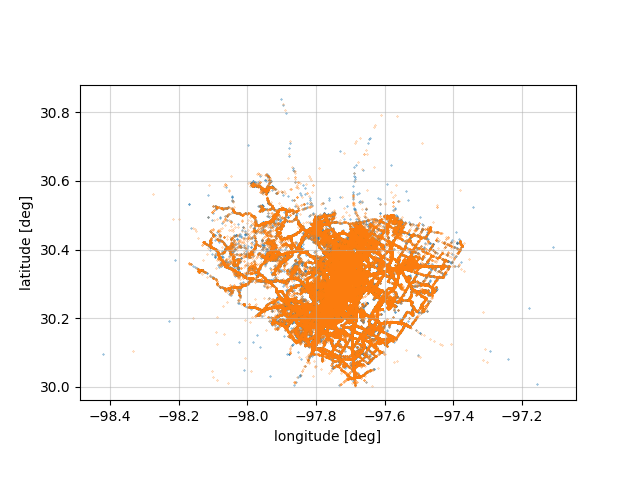

In [78]:
%matplotlib widget
import matplotlib.pyplot as plt

lat = r_df['latitude'].values
lon = r_df['longitude'].values
timestamp = r_df['traffic_report_status_date_time'].values
year = timestamp.astype('datetime64[Y]').astype(int) + 1970
fig, ax = plt.subplots()
ax.scatter(lon[year<2020], lat[year<2020], s=0.1, c='C0')
ax.scatter(lon[year>=2020], lat[year>=2020], s=0.05, c='C1')
ax.grid(True, alpha=0.5)
ax.set_xlabel('longitude [deg]')
ax.set_ylabel('latitude [deg]')
ax.set_aspect('equal')

In [75]:
len(r_df[r_df['issue_reported']=='LOOSE LIVESTOCK'])

10431